## Dendrogram for all Time Steps

Here, all time steps are considered to visualize any changes in the dendrogram as some features evolve. The proximity matrix is calculated for each time step (considering 100 by 100 to reduce time) and directly used without saving it.

A 'for' loop is used to extract relevant rows of the dataset, cluster them and plot the dendrogram.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("adap-ecosys-dataset.csv")
df = df.drop(["SpeciesName"], axis='columns')

df = pd.get_dummies(df, columns=['Diet'])
df = pd.get_dummies(df, columns=['Habitat'])

The changes in the dendrogram by varying the timestep ar very minor and the plots look very similar to each other. In the interactive tool ('interactive.py'), it is slightly easier to see the minor changes.

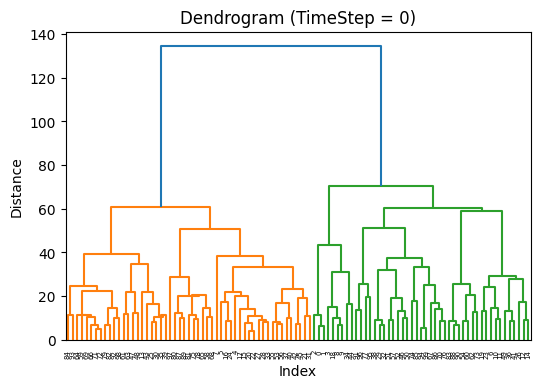

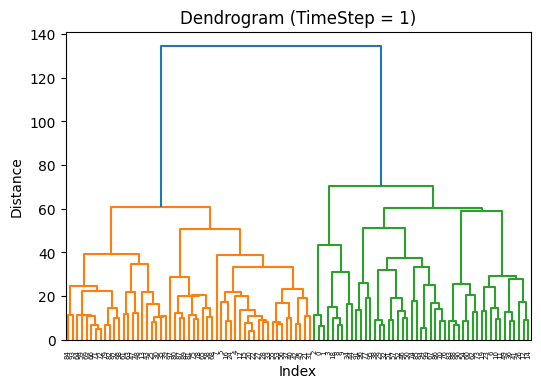

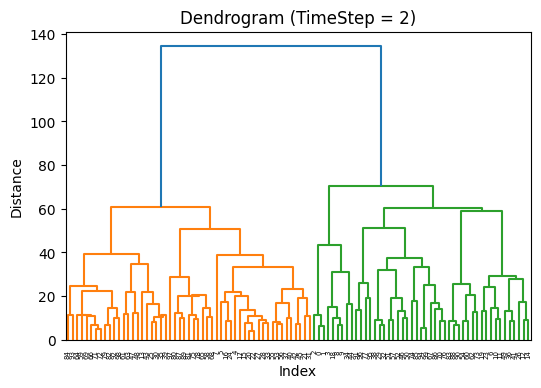

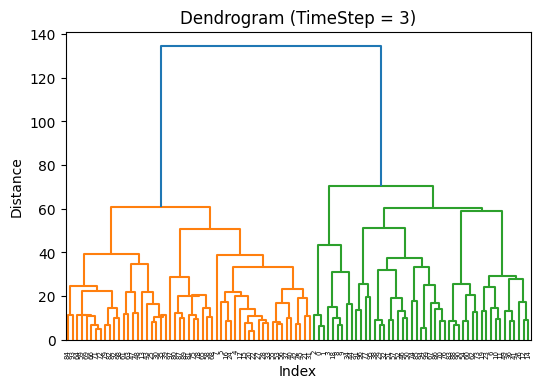

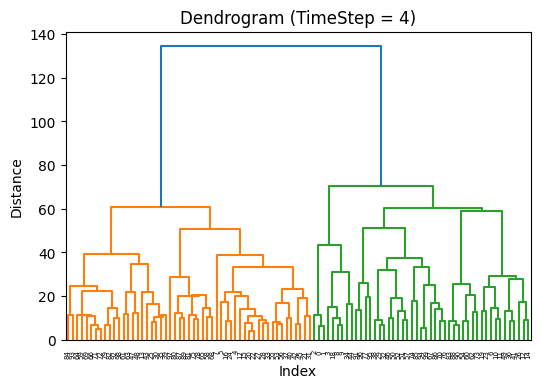

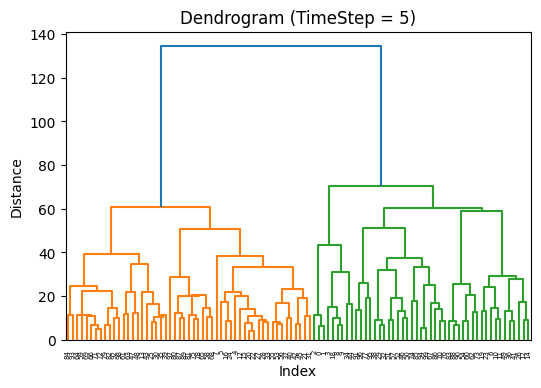

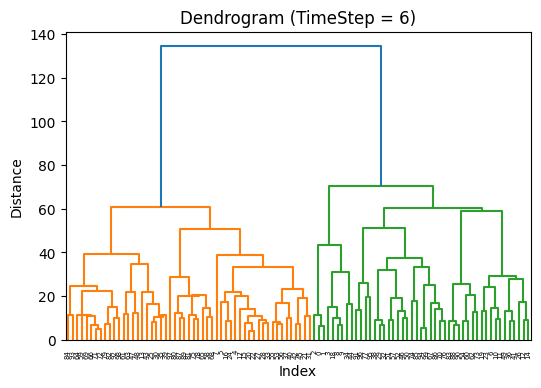

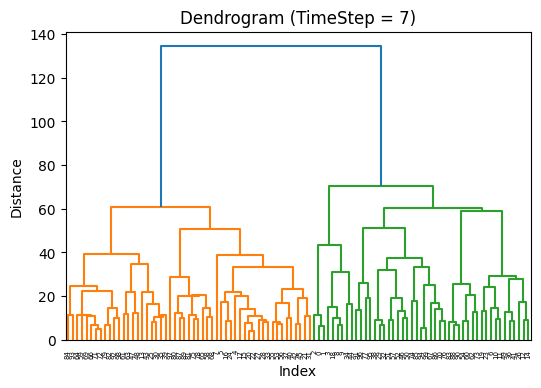

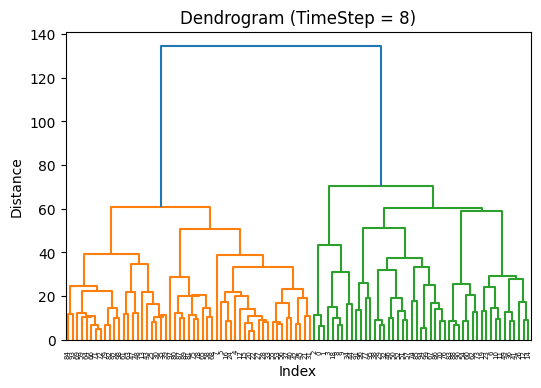

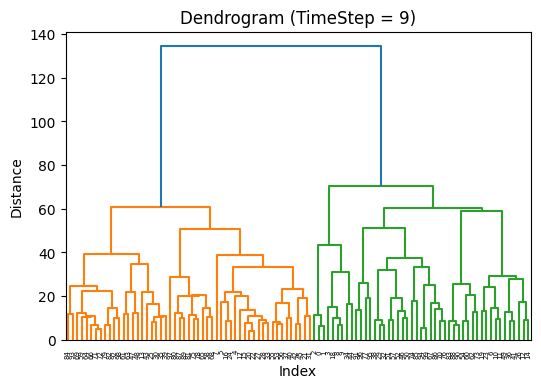

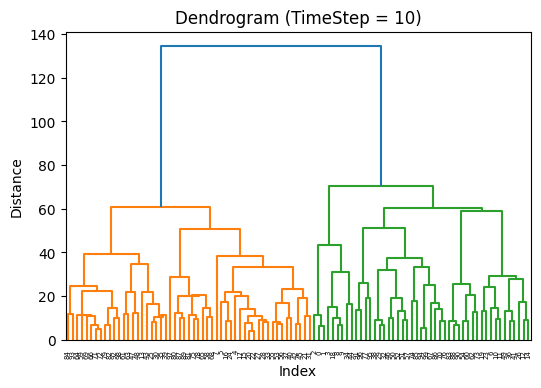

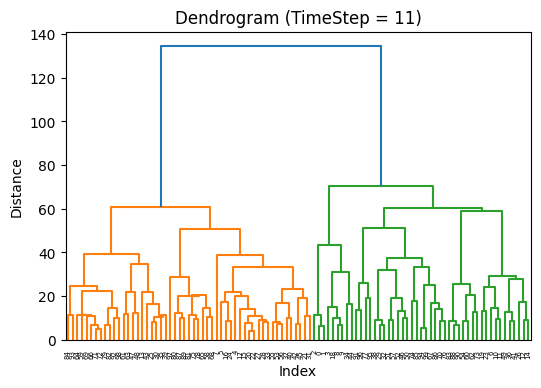

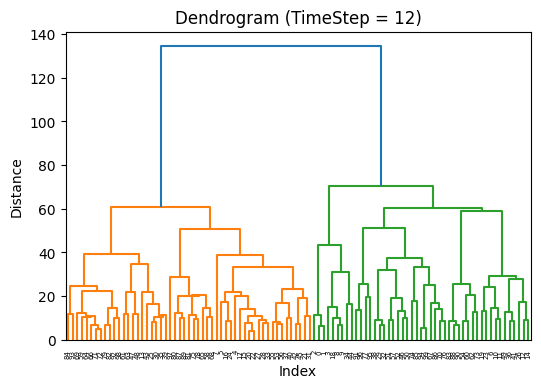

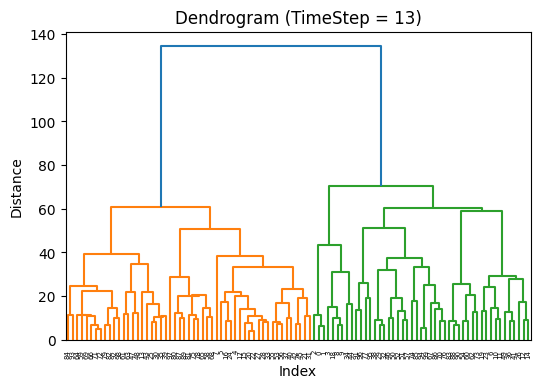

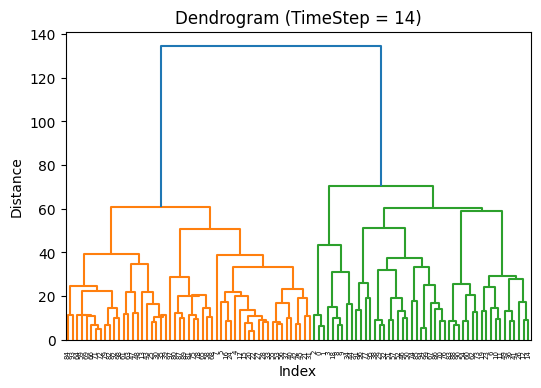

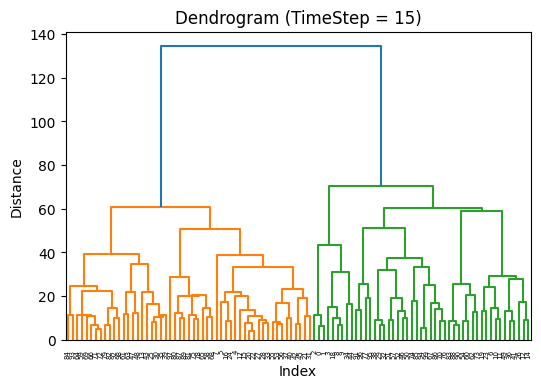

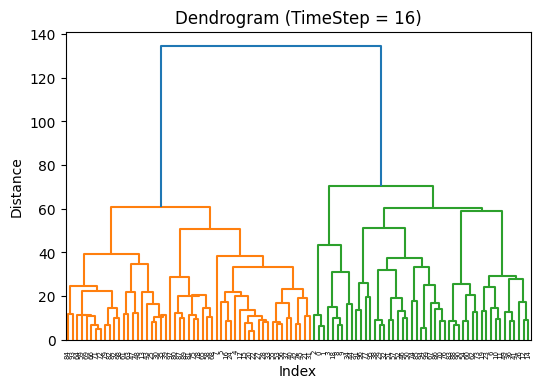

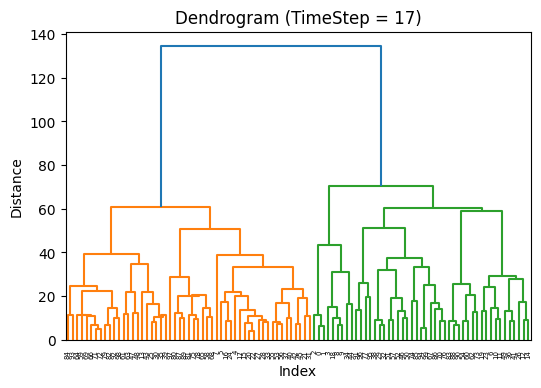

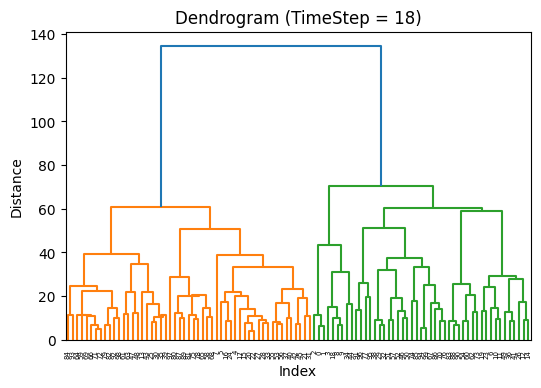

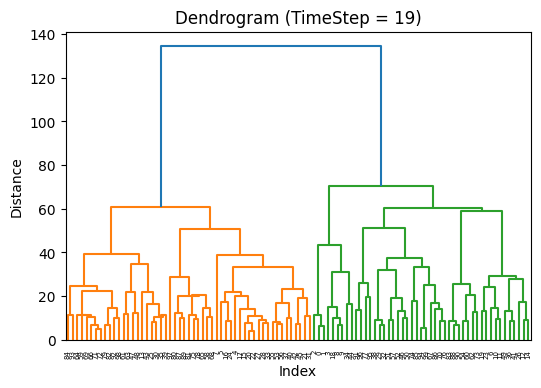

In [5]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def norm(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def create_prox_matrix(df):
    matrix = np.zeros([len(df), len(df)])
    for i in np.arange(len(df)):
        for j in np.arange(len(df)):
            matrix[i, j] = norm(np.array(df.iloc[i].tolist()), np.array(df.iloc[j].tolist()))
    return matrix

def proximity_to_condensed(matrix):
    # Only upper triangle is needed, without diagonal
    return sch.distance.squareform(matrix)

def generate_dendrogram(condensed_dist_matrix, i, method='centroid'):
    plt.figure(figsize=(6, 4))
    dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method=method))
    plt.title(f'Dendrogram (TimeStep = {i})')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

subset_size = 100

for i in range(20):
    df_time = df[df['TimeStep'] == i]
    df_time = df_time.astype(float)
    proximity_matrix = create_prox_matrix(df_time[:subset_size])
    condensed_dist_matrix = proximity_to_condensed(proximity_matrix)
    generate_dendrogram(condensed_dist_matrix, i, method='centroid')
